In [123]:
from konlpy.tag import Komoran
from collections import Counter
import re

In [124]:
f = open("바이러스강연록.txt", 'r', encoding= 'CP949')
texts = f.readlines()
f.close()
texts

['제가 어렸을 때, 우리가 가장 걱정했던 재난은 핵 전쟁이었습니다. 그래서 우리 지하실에는 이렇게 음식 통조림들과 물로 채워진 원통들이 있었습니다. 핵 공격을 당했을 때, 아래층으로 내려가 쪼그려 앉아서 원통 안의 것을 꺼내 먹는 것이지요. \n',
 '오늘날 세계적인 재앙의 최대 위험은 이렇게 생긴 것이 아닙니다. 그보다는, 이렇게 생겼습니다. 앞으로 몇 십년간 만약 무엇인가 천만명이 넘는 사람들을 죽인다면, 그것은 아마도 전쟁이 아니라 매우 전염성이 강한 바이러스일 겁니다. 미사일이 아니고 미생물일 것입니다. 그 이유 중의 하나는 우리가 막대한 양을 핵 억제력에 투자했다는 것입니다. 그러나 실질적으로 우리는 전염병을 멈출 시스템에 매우 적게 투자를 해왔습니다. 우리는 다음 전염병에 준비되지 않았습니다. \n',
 '에볼라의 경우를 살펴봅시다. 여러분 모두 에볼라에 대해 신문에서 읽어보셨을 겁니다. 매우 힘든 문제였습니다. 저는 소아마비 퇴치을 추적할 때 사용하는 사례 분석 도구를 통해 유심히 따라가며 살펴보았습니다. 무슨 일이 있었는지 여러분이 보시다시피, 효과가 없는 시스템이 문제가 아니라 문제는 우리에게 시스템 자체가 없었던 것이었습니다. 사실상, 꽤 명백하고, 중요한 빠져있는 단서들이 있습니다. \n',
 '우리에게는 한 발자국 나아가서, 질병이 무엇이었는지 알 수 있었던, 그것이 얼마나 퍼졌는지 볼 수 있는 전염병학자들이 준비되지 않았었습니다. 발생현황이 신문에 보도되었습니다. 온라인에 올라오기 전에 굉장히 지체되어 있었고, 정보 또한 매우 부정확했었습니다. 우리에게는 준비된 의료팀이 없었습니다. 사람들을 어떻게 준비시켜야 하는지도 몰랐습니다. 국경없는 의사회에서는 봉사자들을 굉장히 잘 이끌었습니다. 그럼에도 우리는 이 국가들에 수천명의 봉사자들을 투입하는데 우리가 해야 했던 것보다 훨씬 뒤쳐져 있었습니다. 그리고 규모가 큰 전염병은 수십만명의 봉사자들이 필요할 것입니다. 치료방법을 찾아 볼 사람이 없었습니다. 진단을 내릴 사람도 없었습니다. 어떤

In [125]:
def cleansing(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail주소제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)' # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]' # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text    

In [126]:
clean_texts = []
for text in texts:
    a = cleansing(text)
    clean_texts.append(a)
clean_texts

['제가 어렸을 때 우리가 가장 걱정했던 재난은 핵 전쟁이었습니다 그래서 우리 지하실에는 이렇게 음식 통조림들과 물로 채워진 원통들이 있었습니다 핵 공격을 당했을 때 아래층으로 내려가 쪼그려 앉아서 원통 안의 것을 꺼내 먹는 것이지요 \n',
 '오늘날 세계적인 재앙의 최대 위험은 이렇게 생긴 것이 아닙니다 그보다는 이렇게 생겼습니다 앞으로 몇 십년간 만약 무엇인가 천만명이 넘는 사람들을 죽인다면 그것은 아마도 전쟁이 아니라 매우 전염성이 강한 바이러스일 겁니다 미사일이 아니고 미생물일 것입니다 그 이유 중의 하나는 우리가 막대한 양을 핵 억제력에 투자했다는 것입니다 그러나 실질적으로 우리는 전염병을 멈출 시스템에 매우 적게 투자를 해왔습니다 우리는 다음 전염병에 준비되지 않았습니다 \n',
 '에볼라의 경우를 살펴봅시다 여러분 모두 에볼라에 대해 신문에서 읽어보셨을 겁니다 매우 힘든 문제였습니다 저는 소아마비 퇴치을 추적할 때 사용하는 사례 분석 도구를 통해 유심히 따라가며 살펴보았습니다 무슨 일이 있었는지 여러분이 보시다시피 효과가 없는 시스템이 문제가 아니라 문제는 우리에게 시스템 자체가 없었던 것이었습니다 사실상 꽤 명백하고 중요한 빠져있는 단서들이 있습니다 \n',
 '우리에게는 한 발자국 나아가서 질병이 무엇이었는지 알 수 있었던 그것이 얼마나 퍼졌는지 볼 수 있는 전염병학자들이 준비되지 않았었습니다 발생현황이 신문에 보도되었습니다 온라인에 올라오기 전에 굉장히 지체되어 있었고 정보 또한 매우 부정확했었습니다 우리에게는 준비된 의료팀이 없었습니다 사람들을 어떻게 준비시켜야 하는지도 몰랐습니다 국경없는 의사회에서는 봉사자들을 굉장히 잘 이끌었습니다 그럼에도 우리는 이 국가들에 수천명의 봉사자들을 투입하는데 우리가 해야 했던 것보다 훨씬 뒤쳐져 있었습니다 그리고 규모가 큰 전염병은 수십만명의 봉사자들이 필요할 것입니다 치료방법을 찾아 볼 사람이 없었습니다 진단을 내릴 사람도 없었습니다 어떤 도구들을 사용해야 하는지 알아내야 할 사람도 없었습니다 예를 들

In [127]:
komo = Komoran()

In [128]:
komoran_userdic = Komoran(userdic='./userdic.txt')

In [129]:
nouns = []
for text in clean_texts:
    nouns.append(komo.nouns(text))
nouns

[['제가',
  '때',
  '걱정',
  '재난',
  '핵',
  '전쟁',
  '지하실',
  '음식',
  '통조림',
  '물',
  '원통',
  '핵',
  '공격',
  '때',
  '아래층',
  '원통',
  '안',
  '것',
  '것'],
 ['오늘날',
  '세계',
  '재앙',
  '최대',
  '위험',
  '것',
  '앞',
  '년',
  '간',
  '명',
  '사람',
  '전쟁',
  '전염',
  '바이러스',
  '일',
  '겁',
  '니다',
  '미사일',
  '미생물',
  '일',
  '것',
  '이유',
  '중',
  '양',
  '핵',
  '억제력',
  '투자',
  '것',
  '실질',
  '전염병',
  '시스템',
  '투자',
  '다음',
  '전염병',
  '준비'],
 ['에볼라',
  '경우',
  '여러분',
  '에볼라',
  '신문',
  '겁',
  '니다',
  '문제',
  '소아마비',
  '퇴치',
  '을',
  '추적',
  '때',
  '사용',
  '사례',
  '분석',
  '도구',
  '일',
  '효과',
  '시스템',
  '문제',
  '문제',
  '시스템',
  '자체',
  '것',
  '사실',
  '단서'],
 ['발자국',
  '질병',
  '수',
  '수',
  '전염병',
  '학자',
  '준비',
  '발생',
  '현황',
  '신문',
  '보도',
  '온라인',
  '전',
  '지체',
  '정보',
  '준비',
  '의료',
  '팀',
  '사람',
  '준비',
  '국경',
  '의사회',
  '봉사자',
  '국가',
  '수',
  '천명',
  '봉사자',
  '투입',
  '것',
  '규모',
  '전염병',
  '명',
  '봉사자',
  '필요',
  '것',
  '치료',
  '방법',
  '사람',
  '진단',
  '사람',
  '도구',
  '사용',
  '사람',
  '예',
  '생존

In [130]:
n_words = sum(nouns, [])
n_words

['제가',
 '때',
 '걱정',
 '재난',
 '핵',
 '전쟁',
 '지하실',
 '음식',
 '통조림',
 '물',
 '원통',
 '핵',
 '공격',
 '때',
 '아래층',
 '원통',
 '안',
 '것',
 '것',
 '오늘날',
 '세계',
 '재앙',
 '최대',
 '위험',
 '것',
 '앞',
 '년',
 '간',
 '명',
 '사람',
 '전쟁',
 '전염',
 '바이러스',
 '일',
 '겁',
 '니다',
 '미사일',
 '미생물',
 '일',
 '것',
 '이유',
 '중',
 '양',
 '핵',
 '억제력',
 '투자',
 '것',
 '실질',
 '전염병',
 '시스템',
 '투자',
 '다음',
 '전염병',
 '준비',
 '에볼라',
 '경우',
 '여러분',
 '에볼라',
 '신문',
 '겁',
 '니다',
 '문제',
 '소아마비',
 '퇴치',
 '을',
 '추적',
 '때',
 '사용',
 '사례',
 '분석',
 '도구',
 '일',
 '효과',
 '시스템',
 '문제',
 '문제',
 '시스템',
 '자체',
 '것',
 '사실',
 '단서',
 '발자국',
 '질병',
 '수',
 '수',
 '전염병',
 '학자',
 '준비',
 '발생',
 '현황',
 '신문',
 '보도',
 '온라인',
 '전',
 '지체',
 '정보',
 '준비',
 '의료',
 '팀',
 '사람',
 '준비',
 '국경',
 '의사회',
 '봉사자',
 '국가',
 '수',
 '천명',
 '봉사자',
 '투입',
 '것',
 '규모',
 '전염병',
 '명',
 '봉사자',
 '필요',
 '것',
 '치료',
 '방법',
 '사람',
 '진단',
 '사람',
 '도구',
 '사용',
 '사람',
 '예',
 '생존자',
 '피',
 '처리',
 '과정',
 '혈장',
 '사람',
 '주입',
 '예방',
 '수',
 '번',
 '시도',
 '것',
 '부족',
 '국제',
 '실패',
 '세계보건기구',
 '전염병',
 '감시',
 '기금'

In [131]:
count = Counter(n_words)
count

Counter({'제가': 2,
         '때': 5,
         '걱정': 1,
         '재난': 1,
         '핵': 3,
         '전쟁': 3,
         '지하실': 2,
         '음식': 1,
         '통조림': 1,
         '물': 1,
         '원통': 2,
         '공격': 1,
         '아래층': 1,
         '안': 1,
         '것': 20,
         '오늘날': 1,
         '세계': 4,
         '재앙': 1,
         '최대': 1,
         '위험': 1,
         '앞': 1,
         '년': 3,
         '간': 1,
         '명': 4,
         '사람': 16,
         '전염': 3,
         '바이러스': 6,
         '일': 8,
         '겁': 8,
         '니다': 8,
         '미사일': 1,
         '미생물': 1,
         '이유': 2,
         '중': 1,
         '양': 1,
         '억제력': 1,
         '투자': 3,
         '실질': 1,
         '전염병': 15,
         '시스템': 6,
         '다음': 4,
         '준비': 10,
         '에볼라': 9,
         '경우': 1,
         '여러분': 1,
         '신문': 2,
         '문제': 4,
         '소아마비': 1,
         '퇴치': 1,
         '을': 1,
         '추적': 1,
         '사용': 3,
         '사례': 1,
         '분석': 1,
         '도구': 2,
     

In [132]:
from wordcloud import WordCloud

font_path = '/사용자/kim_yoonhye/라이브러리/fonts/NanumBarunpenR.otf'

wordcloud = WordCloud(
    font_path=font_path,
    width = 800,
    height = 800
)

In [133]:
wordcloud = wordcloud.generate_from_frequencies(count)

In [134]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

array = wordcloud.to_array()

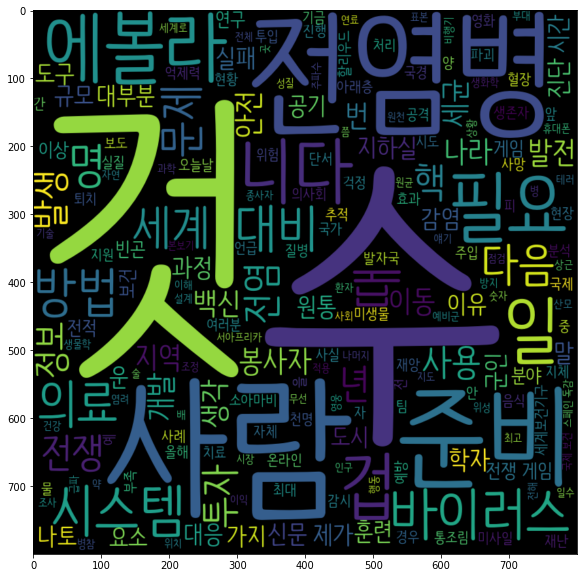

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('POS-korean.png')